In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv("LLCP2020.csv")

In [106]:
df = data.copy()
df.shape

(401958, 280)

In [107]:
variables = ['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'ASTHMA3', 'HAVARTH4', '_MRACE1', 'SEXVAR', '_AGE_G', 'HEIGHT3', 'WEIGHT2', '_MICHD', 'SMOKE100']
df = df[variables]
df = df[(df['_MICHD'] == 1) | (df['_MICHD'] == 2)]
df['_MICHD'] = df['_MICHD'].replace({
    2: 0
    })
df['GENHLTH'] = df['GENHLTH'].replace({
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair', 
    5: 'Poor', 
    7: np.NaN, 
    9: np.NaN})
df['PHYSHLTH'] = df['PHYSHLTH'].replace({
    88: 0,
    77: np.NaN,
    99: np.NaN
})
df['MENTHLTH'] = df['MENTHLTH'].replace({
    88: 0,
    77: np.NaN,
    99: np.NaN
})
df['EXERANY2'] = df['EXERANY2'].replace({
    1: 'Yes',
    2: 'No',
    7: np.NaN,
    9: np.NaN
})
df['CVDINFR4'] = df['CVDINFR4'].replace({
    1: 'Yes',
    2: 'No',
    7: np.NaN,
    9: np.NaN
})
df['CVDCRHD4'] = df['CVDCRHD4'].replace({
    1: 'Yes',
    2: 'No',
    7: np.NaN,
    9: np.NaN
})
df['ASTHMA3'] = df['ASTHMA3'].replace({
    1: 'Yes',
    2: 'No',
    7: np.NaN,
    9: np.NaN
})
df['HAVARTH4'] = df['HAVARTH4'].replace({
    1: 'Yes',
    2: 'No',
    7: np.NaN,
    9: np.NaN
})
df['_MRACE1'] = df['_MRACE1'].replace({
    1: 'White',
    2: 'Black',
    3: 'American Indian or Alaskan Native only',
    4: 'Asian',
    5: 'Native Hawaiian or other Pacific Islander',
    6: 'Other',
    7: 'Multiracial',
    8: 'Hispanic',
    9: np.NaN
})
df['SEXVAR'] = df['SEXVAR'].replace({
    1: 'Male',
    2: 'Female'
})
df['_AGE_G'] = df['_AGE_G'].replace({
    1: 'Age 18 to 24',
    2: 'Age 25 to 34',
    3: 'Age 35 to 44',
    4: 'Age 45 to 54',
    5: 'Age 55 to 64',
    6: 'Age 65 or older'
})
df['HEIGHT3'] = df['HEIGHT3'].replace({
    7777: np.NaN,
    9999: np.NaN
})
df['WEIGHT2'] = df['WEIGHT2'].replace({
    7777: np.NaN,
    9999: np.NaN
})
df['SMOKE100'] = df['SMOKE100'].replace({
    1: 'Yes',
    2: 'No',
    7: np.NaN,
    9: np.NaN
})

df = df.dropna()
df.shape

(336947, 15)

In [144]:
dummy_df = pd.get_dummies(df)
y = dummy_df['_MICHD']
x = dummy_df.drop('_MICHD', axis=1)

In [145]:
dummy_df.corr()

,PHYSHLTH,MENTHLTH,HEIGHT3,WEIGHT2,_MICHD,GENHLTH_Excellent,GENHLTH_Fair,GENHLTH_Good,GENHLTH_Poor,GENHLTH_Very good,...,SEXVAR_Female,SEXVAR_Male,_AGE_G_Age 18 to 24,_AGE_G_Age 25 to 34,_AGE_G_Age 35 to 44,_AGE_G_Age 45 to 54,_AGE_G_Age 55 to 64,_AGE_G_Age 65 or older,SMOKE100_No,SMOKE100_Yes
PHYSHLTH,1.000000,0.291212,-0.011316,-0.002673,0.168228,-0.173222,0.303006,-0.039829,0.475024,-0.196777,...,0.040437,-0.040437,-0.055509,-0.065406,-0.046201,-0.002411,0.052067,0.063636,-0.116231,0.116231
MENTHLTH,0.291212,1.000000,-0.018214,-0.008512,0.028457,-0.111966,0.151607,0.011829,0.195597,-0.090769,...,0.099520,-0.099520,0.074885,0.069722,0.046698,0.022798,-0.006391,-0.130473,-0.086844,0.086844
HEIGHT3,-0.011316,-0.018214,1.000000,0.375958,-0.014292,0.005674,0.006010,0.015407,-0.008264,-0.020167,...,-0.043536,0.043536,0.015237,0.037012,0.031439,0.006425,-0.016457,-0.045979,0.019353,-0.019353
WEIGHT2,-0.002673,-0.008512,0.375958,1.000000,-0.004544,0.000310,0.002000,0.009838,0.000951,-0.011288,...,-0.052092,0.052092,0.009017,0.028592,0.025527,0.006308,-0.007444,-0.040371,0.008666,-0.008666
_MICHD,0.168228,0.028457,-0.014292,-0.004544,1.000000,-0.114218,0.145803,0.036364,0.171930,-0.099196,...,-0.069773,0.069773,-0.074235,-0.094666,-0.090192,-0.058320,0.004232,0.206102,-0.105676,0.105676
GENHLTH_Excellent,-0.173222,-0.111966,0.005674,0.000310,-0.114218,1.000000,-0.179528,-0.330293,-0.099250,-0.380901,...,-0.021537,0.021537,0.065135,0.065450,0.053092,0.023196,-0.021045,-0.115125,0.117373,-0.117373
GENHLTH_Fair,0.303006,0.151607,0.006010,0.002000,0.145803,-0.179528,1.000000,-0.224222,-0.067377,-0.258578,...,0.022156,-0.022156,-0.046153,-0.052204,-0.037052,-0.012165,0.027611,0.071238,-0.094970,0.094970
GENHLTH_Good,-0.039829,0.011829,0.015407,0.009838,0.036364,-0.330293,-0.224222,1.000000,-0.123958,-0.475728,...,-0.003943,0.003943,-0.029134,-0.024039,-0.014061,-0.010338,-0.004436,0.052681,-0.058999,0.058999
GENHLTH_Poor,0.475024,0.195597,-0.008264,0.000951,0.171930,-0.099250,-0.067377,-0.123958,1.000000,-0.142952,...,0.010677,-0.010677,-0.040873,-0.046958,-0.036804,-0.005090,0.035196,0.053148,-0.087195,0.087195
GENHLTH_Very good,-0.196777,-0.090769,-0.020167,-0.011288,-0.099196,-0.380901,-0.258578,-0.475728,-0.142952,1.000000,...,0.003494,-0.003494,0.018239,0.019432,0.006646,-0.000001,-0.009544,-0.019214,0.051995,-0.051995


In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=123)
scaler = MinMaxScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [142]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(x_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 1.00
Precision of logistic regression classifier on test set: 1.00


[[154548      0]
 [     0  13926]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    154548
         1.0       1.00      1.00      1.00     13926

    accuracy                           1.00    168474
   macro avg       1.00      1.00      1.00    168474
weighted avg       1.00      1.00      1.00    168474



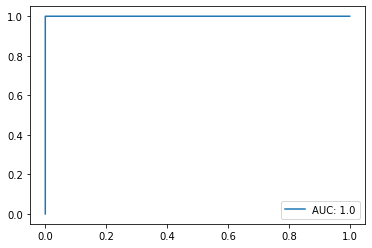

In [143]:
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[::, 1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred, y_test))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC: {round(auc, 3)}')
plt.legend()
plt.show()